# Data Science Fundamentals - Linear Algebra - Exercise: Column-Space and Null-Space

## Table of Contents
* [Introduction](#Introduction)
* [Requirements](#Requirements) 
  * [Knowledge](#Knowledge) 
  * [Modules](#Python-Modules)
* [Exercise: Pen and Paper Calculation](#Pen-and-Paper-Calculation)
* [Exercise: Visualization of the Column and Null Space](#Implementation-of-Basic-Operations)
* [Summary and Outlook](#Summary-and-Outlook)
* [Literature](#Literature) 
* [Licenses](#Licenses) 

## Introduction

This exercise tests knowledge in basics in linear algebra. Knowledge about linear transformations is essential in understanding more complex machine learning topics, like neural networks. Safe handling of domain-specific notation and concepts is therefore necessary.  

## Requirements

### Knowledge

The matrix-vector product can be interpreted as linear combination of column vectors, e.g.:

\begin{equation}
    A \vec x=
    \begin{pmatrix}
    2 & 0  \\
    1 & 1 \\
    1 & 3 
    \end{pmatrix} 
    \begin{pmatrix}
    x_1  \\
    x_2 
    \end{pmatrix} = x_1 \vec a_1 + x_2 \vec a_2
\end{equation}

with the column vectors
$$
 \vec a_1 =
    \begin{pmatrix}
    2  \\
    1  \\
    1 
\end{pmatrix}
$$
and 
$$
 \vec a_2 =
    \begin{pmatrix}
    0  \\
    1  \\
    3 
\end{pmatrix}
$$.

Therefore, the solution vector $\vec b$ of $A \vec x= \vec b$ is in the plane spanned by the column vectors $\vec a_1$ and $\vec a_2$.
So, $\vec b$ can not be arbitrary.

The corresponding equation $A\vec x = \vec c$, with a given $\vec c$, has only a solution if $\vec c$ is in the column space of $A$.


 In general, $A \vec x$ is a linear combination of the column vectors for $A$. 

#### Further readings: text books on linear algebra

- [Linear Algebra](http://joshua.smcvt.edu/linearalgebra/#current_version) by Jim Hefferson is a open-source textbook with a lot of good exercises
- [Introduction to Linear Algebra](http://math.mit.edu/~gs/linearalgebra/) by Gilbert Strang is a good domain specific textbook
- [Linear Algebra and Learning from Data](http://math.mit.edu/~gs/learningfromdata/) by Gilbert Strang is a good textbook which connects the fundamentals of linear algebra with learning from data
- [Coding the Matrix: Linear Algebra through Applications to Computer Science](http://codingthematrix.com/) by Philip Klein is focused on a computer science viewpoint



### Python Modules

In [1]:
# External Modules
import numpy as np

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

#### Exercise

Given is the matrix:
\begin{equation}
    A =
    \begin{pmatrix}
    v_1 & w_1 & 2 v_1+w_1 \\
    v_2 & w_2 & 2 v_2+w_2\\
    v_3 & w_3 & 2 v_3+w_3
    \end{pmatrix}
\end{equation}





- What is the column space of $A$? What is the dimension of the column space? What is the rank of the matrix $A$?
- What is the nullspace of $A$? What is the dimension of the nullspace?

In general, the nullspace of a matrix $A$ is the space of all vectors $\vec x$ that solve $A \vec x = \vec 0$ 

#### Exercise

Plot the column space and the null space in a 3D-Plot

with $\vec v$ and $\vec w$ given by
$$ \vec v =
\begin{pmatrix}
    1 \\
    1  \\
    2
    \end{pmatrix}
$$
$$\vec w = 
\begin{pmatrix}
    2 \\
    1  \\
    1
    \end{pmatrix}.
$$

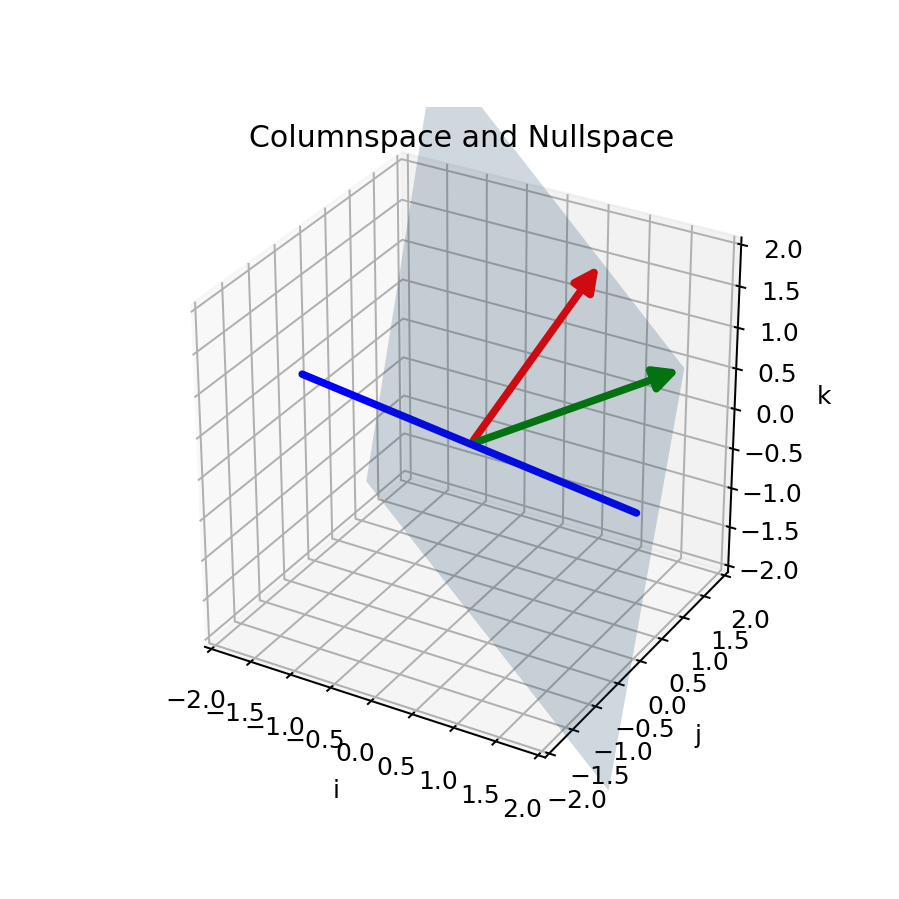

In [6]:
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)


<IPython.core.display.Javascript object>


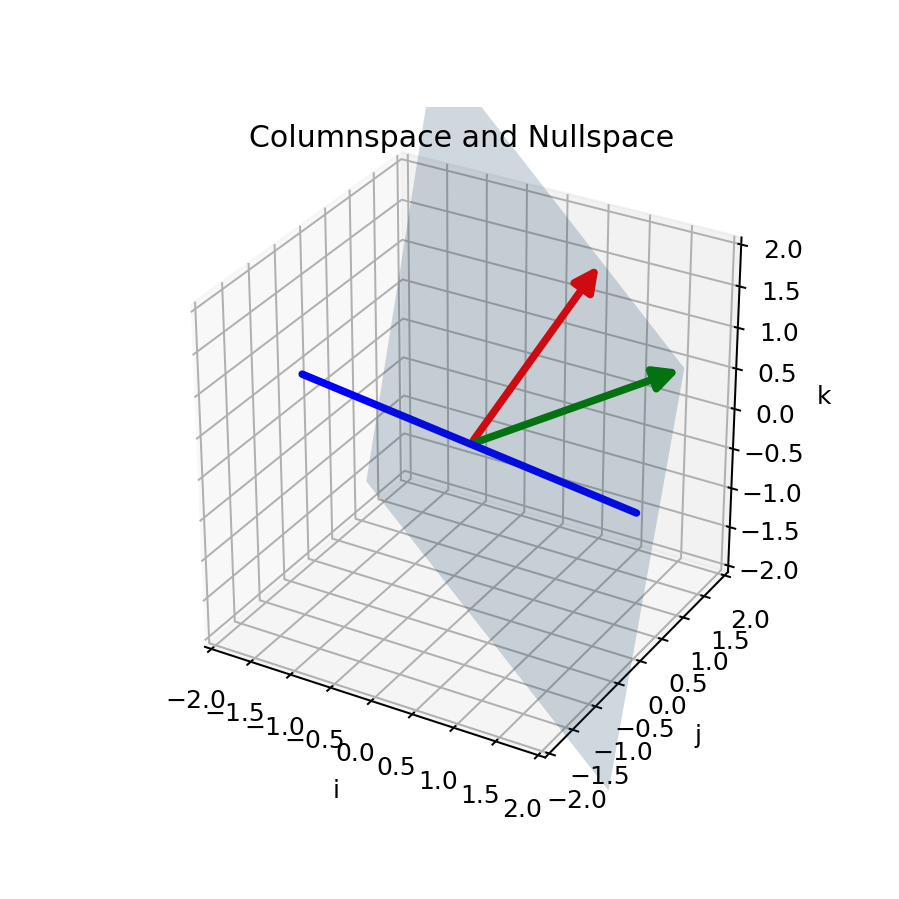

In [7]:
%matplotlib notebook

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')

def plot_vector(v, color, arrowstyle="-|>", start=[0,0,0], label=None):
    v_vec = Arrow3D([start[0],v[0]],[start[1], v[1]],[start[2], v[2]], mutation_scale=20, lw=3, arrowstyle=arrowstyle, color=color) 
    ax.add_artist(v_vec)

plot_vector(v, color="r")#, label="Eigenvector 1")
plot_vector(w, color="g")#, label="Eigenvector 2")

plot_vector(2*x, color="b", arrowstyle="-", start=-2*x)

    
    
# plot the plane of the column space
point  = np.array([0, 0, 0])
normal = np.cross(v,w)  

# create x,y
#xx, yy = np.meshgrid(np.arange(-1,2.5), np.arange(0,1.5))
xx, yy = np.meshgrid(np.linspace(-1,2.,2), np.linspace(-.5,1.,2))
# a plane is a*x+b*y+c*z+d=0
# [a,b,c] is the normal. Thus, we have to calculate
# d and we're set
d = -point.dot(normal)
# calculate corresponding z
z = (-normal[0] * xx - normal[1] * yy - d) * 1. /normal[2]

# plot the surface #  TODO!!
ax.plot_surface(xx, yy, z, alpha=0.2) 
    
    
ax.set_xlabel('i')
ax.set_ylabel('j')
ax.set_zlabel('k')
ax.set_xlim(-2.,2.)
ax.set_ylim(-2.,2.)
ax.set_zlim(-2.,2.)
plt.title('Columnspace and Nullspace')
#plt.legend()
plt.draw()
plt.show()


## Summary and Outlook

This exercise covered some properties of  linear transformations. 
If the exercise was too complicated, consider the sources mentioned above for a recap. 

## Literature

<table>
    <tr>
        <td>
            <a name="STR19"></a>[STR19]
        </td>
        <td>
            Gilbert Strang, "Linear Algebra and Learning from Data", Wellesley-Cambridge Press, 2019
        </td>
    </tr>
    <tr>
        <td>
            <a name="HEF17"></a>[HEF17]
        </td>
        <td>
            Jim Hefferon, "Linear Algebra",Saint Michael's College, USA, 2017
        </td>
    </tr>
    <tr>
        <td>
            <a name="STR16"></a>[STR16]
        </td>
        <td>
           Gilbert Strang, "Introduction to Linear Algebra", Wellesley-Cambridge Press, 2016
        </td>
    </tr>
    <tr>
        <td>
            <a name="KLE13"></a>[KLE13]
        </td>
        <td>
           Gilbert Strang, "Coding the Matrix", Newtonian Press, 2013
        </td>
    </tr>
 </table>  

## Licenses

### Notebook License (CC-BY-SA 4.0)

*The following license applies to the complete notebook, including code cells. It does however not apply to any referenced external media (e.g., images).*

Exercise: Column Space and Null Space <br/>
by Christian Herta <br/>
is licensed under a [Creative Commons Attribution-ShareAlike 4.0 International License](http://creativecommons.org/licenses/by-sa/4.0/).<br/>
Based on a work at https://gitlab.com/deep.TEACHING.


### Code License (MIT)

*The following license only applies to code cells of the notebook.*

Copyright 2019 Christian Herta

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.